## Loading the CIFAR10 dataset

In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

weight_decay = 1e-4





Using TensorFlow backend.


## Build overfitting model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
batch_size = 64
epochs = 20
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
781/781 [==============================] - 28s 36ms/step - loss: 2.3017 - acc: 0.4240 - val_loss: 2.4177 - val_acc: 0.4919
Epoch 2/20
781/781 [==============================] - 26s 33ms/step - loss: 1.4472 - acc: 0.5931 - val_loss: 1.2449 - val_acc: 0.6305
Epoch 3/20
781/781 [==============================] - 26s 33ms/step - loss: 1.2520 - acc: 0.6421 - val_loss: 1.0276 - val_acc: 0.6857
Epoch 4/20
781/781 [==============================] - 26s 33ms/step - loss: 1.1356 - acc: 0.6754 - val_loss: 0.9983 - val_acc: 0.6926
Epoch 5/20
781/781 [==============================] - 26s 33ms/step - loss: 1.0090 - acc: 0.6986 - val_loss: 1.0710 - val_acc: 0.6955
Epoch 6/20
781/781 [==============================] - 25s 32ms/step - loss: 0.8538 - acc: 0.7257 - val_loss: 1.0465 - val_acc: 0.6908
Epoch 7/20
781/781 [==============================] - 26s 33ms/step - loss: 0.8045 - a

## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

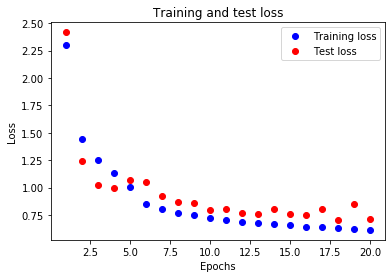

In [4]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

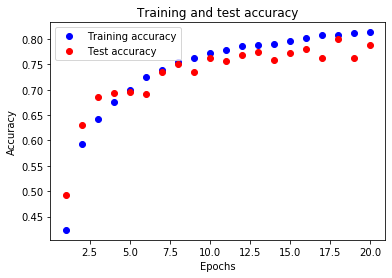

In [6]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build underfitting model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
batch_size = 64
epochs = 20
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/20
781/781 [==============================] - 24s 31ms/step - loss: 2.1917 - acc: 0.4337 - val_loss: 1.7191 - val_acc: 0.5447
Epoch 2/20
781/781 [==============================] - 24s 30ms/step - loss: 1.3344 - acc: 0.5805 - val_loss: 1.1597 - val_acc: 0.6364
Epoch 3/20
781/781 [==============================] - 24s 30ms/step - loss: 1.0804 - acc: 0.6400 - val_loss: 1.2261 - val_acc: 0.6334
Epoch 4/20
781/781 [==============================] - 23s 30ms/step - loss: 0.9663 - acc: 0.6769 - val_loss: 1.0207 - val_acc: 0.6816
Epoch 5/20
781/781 [==============================] - 23s 30ms/step - loss: 0.9036 - acc: 0.6970 - val_loss: 0.9544 - val_acc: 0.7009
Epoch 6/20
781/781 [==============================] - 23s 30ms/step - loss: 0.8542 - acc: 0.7138 - val_loss: 1.0182 - val_acc: 0.6863
Epoch 7/20
781/781 [==============================] - 23s 30ms/step - loss: 0.8300 - acc: 0.7235 - val_loss: 0.8213 - val_acc: 0.7369
Epoch 8/20
781/781 [==============================] - 23s 30ms

## Training/test loss/accuracy during training


In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

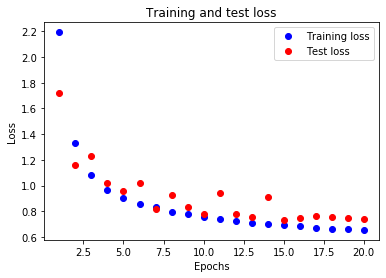

In [9]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

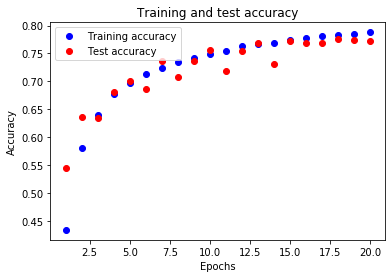

In [11]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Build good model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
batch_size = 64
epochs = 20
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/20
781/781 [==============================] - 27s 35ms/step - loss: 1.9053 - acc: 0.4262 - val_loss: 1.3278 - val_acc: 0.5896
Epoch 2/20
781/781 [==============================] - 25s 33ms/step - loss: 1.2769 - acc: 0.5939 - val_loss: 1.1674 - val_acc: 0.6473
Epoch 3/20
781/781 [==============================] - 25s 33ms/step - loss: 1.0824 - acc: 0.6561 - val_loss: 1.0112 - val_acc: 0.6986
Epoch 4/20
781/781 [==============================] - 25s 32ms/step - loss: 0.9880 - acc: 0.6848 - val_loss: 1.0367 - val_acc: 0.6970
Epoch 5/20
781/781 [==============================] - 25s 32ms/step - loss: 0.9182 - acc: 0.7148 - val_loss: 0.9802 - val_acc: 0.7150
Epoch 6/20
781/781 [==============================] - 25s 33ms/step - loss: 0.8727 - acc: 0.7322 - val_loss: 0.8261 - val_acc: 0.7609
Epoch 7/20
781/781 [==============================] - 25s 32ms/step - loss: 0.838

## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

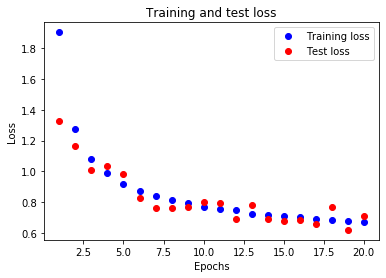

In [14]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

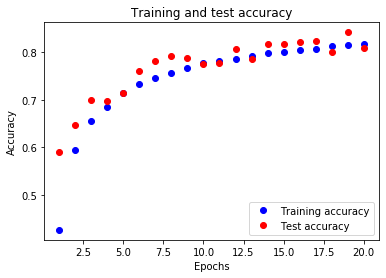

In [16]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()